In [8]:
import pandas as pd

In [9]:
df = pd.read_json('newsdata.json', lines = True)

In [10]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [11]:
df = df.head(3000)

In [12]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
2995,https://www.huffpost.com/entry/deadly-nashvill...,"4 Dead, More Than 100 Rescued After Heavy Rain...",U.S. NEWS,The deadly floodwaters follow Nashville's seco...,Nina Golgowski,2021-03-28
2996,https://www.huffpost.com/entry/richest-1-perce...,America's Richest 1% Dodge Taxes On More Than ...,U.S. NEWS,The money is hidden through a variety of strat...,Mary Papenfuss,2021-03-28
2997,https://www.huffpost.com/entry/sharon-osbourne...,Sharon Osbourne No Longer On 'The Talk',ENTERTAINMENT,CBS said that Osbourne's behavior toward her c...,David Moye,2021-03-27
2998,https://www.huffpost.com/entry/jen-psaki-peter...,Jen Psaki Has It Out With Fox News Reporter Pe...,POLITICS,"""Has the president taken questions from you si...",Mary Papenfuss,2021-03-27


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               3000 non-null   object        
 1   headline           3000 non-null   object        
 2   category           3000 non-null   object        
 3   short_description  3000 non-null   object        
 4   authors            3000 non-null   object        
 5   date               3000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 140.8+ KB


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import jensenshannon
import ruptures as rpt
import matplotlib.pyplot as plt

# 1) Prepare text + parse date
df['date'] = pd.to_datetime(df['date'])
# combine short text fields; drop NaNs
df['text'] = (df['headline'].fillna('') + '. ' + df['short_description'].fillna('')).str.strip()
df = df[df['text'].str.len() > 10].reset_index(drop=True)

# 2) choose bins (example: monthly)
df['time_bin'] = df['date'].dt.to_period('M').dt.to_timestamp()

# 3) embeddings
embed_model = SentenceTransformer("all-MiniLM-L6-v2")   # small & fast
embeddings = embed_model.encode(df['text'].tolist(), show_progress_bar=True, convert_to_numpy=True)

# 4) fit BERTopic
topic_model = BERTopic(embedding_model=embed_model, verbose=True)
topics, probs = topic_model.fit_transform(df['text'].tolist(), embeddings)  # topics: topic id per doc



# attach to df
df['topic'] = topics
df['topic_prob'] = [p.max() if p is not None else 0 for p in probs]  # optional

# ---- TOPIC INTERPRETATION BLOCK (ADD THIS) ----
topic_info = topic_model.get_topic_info()        # summary table
all_topics = topic_info[topic_info['Topic'] >= 0]['Topic'].tolist()

topic_meanings = {}
for t in all_topics:
    words = topic_model.get_topic(t)
    meaning = ", ".join([w[0] for w in words[:5]])  # top 5 words
    topic_meanings[t] = meaning

# merge meanings into your dataframe
df['topic_meaning'] = df['topic'].map(topic_meanings)

# print example
print(topic_info.head())
print(df[['text', 'topic', 'topic_meaning']].head())
# -----------------------------------------------


# 5) topics over time (BERTopic helper)
topics_over_time = topic_model.topics_over_time(df['text'].tolist(), df['time_bin'].tolist(), topics=topics, nr_bins=None)

Batches: 100%|██████████| 94/94 [01:06<00:00,  1.42it/s]
2025-12-05 19:22:01,198 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-05 19:22:35,370 - BERTopic - Dimensionality - Completed ✓
2025-12-05 19:22:35,372 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-05 19:22:35,553 - BERTopic - Cluster - Completed ✓
2025-12-05 19:22:35,560 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-05 19:22:35,787 - BERTopic - Representation - Completed ✓


   Topic  Count                          Name  \
0     -1   1176               -1_the_to_in_of   
1      0    247   0_covid_19_vaccine_vaccines   
2      1     95     1_you_your_these_products   
3      2     86  2_ukraine_russia_russian_war   
4      3     83  3_abortion_court_supreme_roe   

                                      Representation  \
0    [the, to, in, of, and, on, for, at, was, after]   
1  [covid, 19, vaccine, vaccines, to, for, corona...   
2  [you, your, these, products, skin, ll, best, t...   
3  [ukraine, russia, russian, war, ukrainian, inv...   
4  [abortion, court, supreme, roe, law, texas, wa...   

                                 Representative_Docs  
0  [Texas Gov. On State's Deadliest School Shooti...  
1  [Former FDA Chief Says COVID-19 Variant May Ca...  
2  [Is It Dry Skin Or Eczema? Here's How To Tell ...  
3  [Russian Military Slog In Ukraine A ‘Dreadful ...  
4  [Roe v. Wade: Supreme Court Overturns Landmark...  
                                      

19it [00:01,  9.83it/s]


In [15]:
# 6) compute normalized topic distribution per time bin
# pivot to matrix: rows=time bins, cols=topic ids, values = frequencies (or normalized frequency)
pivot = topics_over_time.pivot_table(index='Timestamp', columns='Topic', values='Frequency', aggfunc='sum', fill_value=0)
pivot = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)  # make each row a probability distribution

# 7) compute Jensen-Shannon distances between consecutive bins

jsd = []
times = pivot.index.to_list()
for i in range(1, len(pivot)):
    p = pivot.iloc[i-1].values
    q = pivot.iloc[i].values
    # add tiny eps to avoid zeros if necessary
    d = jensenshannon(p + 1e-12, q + 1e-12)
    jsd.append(d)

# 8) detect change points in the JSD time series
if len(jsd) >= 3:
    algo = rpt.Pelt(model="rbf").fit(np.array(jsd))
    # penalty choice depends on data; adjust or use number of changes
    change_idxs = algo.predict(pen=1.0)  # returns indexes where change points occur (1-based)
else:
    change_idxs = []

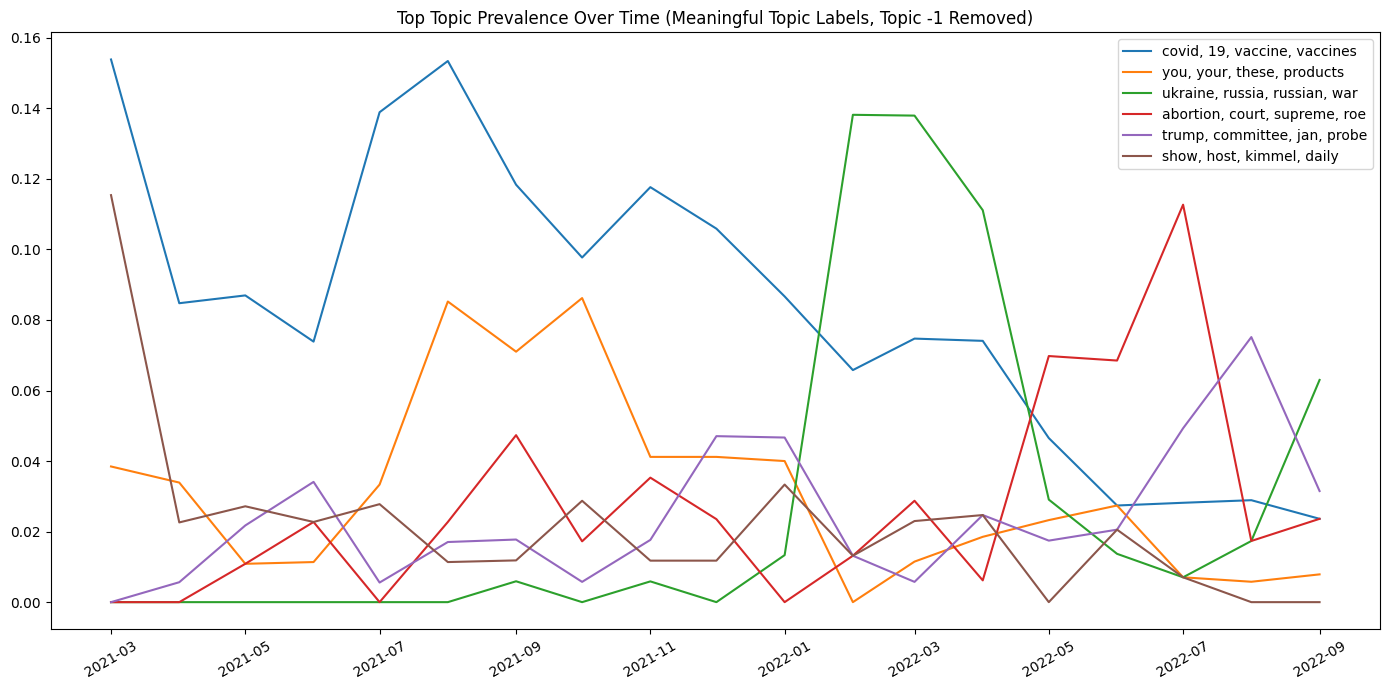

In [16]:
# ---- 9) Plot: Top-K Topic Prevalence Over Time WITH Meaningful Labels (Topic -1 Removed) ----

# Build topic → meaning dictionary
topic_info = topic_model.get_topic_info()
# Only include real topics (Topic >= 0)
valid_topics = topic_info[topic_info['Topic'] >= 0]['Topic'].tolist()

topic_meanings = {}
for t in valid_topics:
    words = topic_model.get_topic(t)
    meaning = ", ".join([w[0] for w in words[:4]])  # top 4 words
    topic_meanings[t] = meaning

# Remove Topic -1 from pivot if it exists
pivot_filtered = pivot.drop(columns=[-1], errors='ignore')

# Select top-K topics from filtered pivot
topk = 6
top_topics = pivot_filtered.sum().sort_values(ascending=False).head(topk).index.tolist()

# Plot topic prevalence
plt.figure(figsize=(14, 7))
for t in top_topics:
    label = topic_meanings.get(t, f"Topic {t}")
    plt.plot(pivot_filtered.index, pivot_filtered[t], label=label)

plt.legend()
plt.title("Top Topic Prevalence Over Time (Meaningful Topic Labels, Topic -1 Removed)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

